In [265]:
from PIL import Image
import numpy as np

JPEG (512, 512) RGB


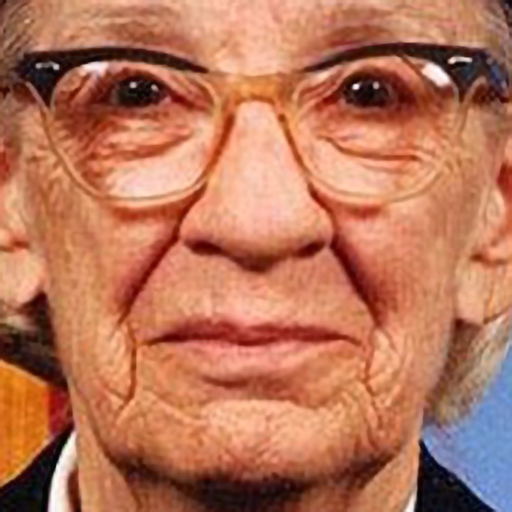

In [266]:
im = Image.open("hopper_crop.jpg")
print(im.format, im.size, im.mode)

slice_width = 16

w , h = im.size

if w % slice_width != 0 or h % slice_width != 0:
    print("Dimensions not divisible by width of slices.")

display(im)

## Slicing the pixels to form a grid of four images

This section first slices the images into 1-pixel wide columns. With all the even columns on the right and odd on the left. The odd columns are reordered to create a mirrow of the original image.

Then it does the same thing vertically with all the even rows on top and the odd rows on bottom and the bottom mirrored. The result is a grid of 2 x 2 copies of the original with the existing pixels, with both vertical and horizontal mirroring.

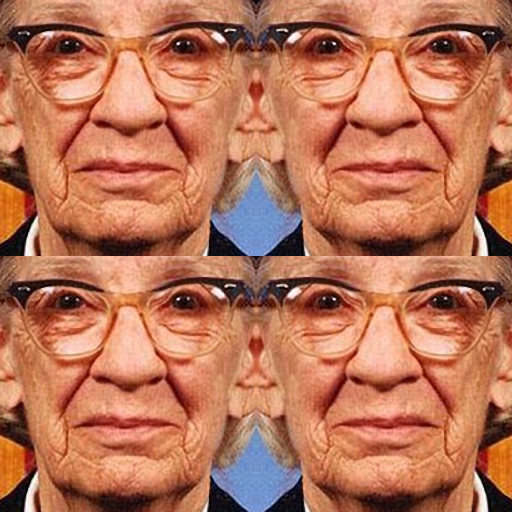

In [267]:
img_array = np.array(im)

# Separate even and odd columns
even_columns = img_array[:, ::2, :]
odd_columns = img_array[:, 1::2, :]

#flip the odd columns
odd_columns = odd_columns[:, ::-1, :]

# Concatenate even and odd columns side by side
new_img_array = np.hstack((even_columns, odd_columns))

# Separate even and odd rows
even_rows = new_img_array[::2, :, :]
odd_rows = new_img_array[1::2, :, :]

# odd_rows = odd_rows[::-1, :, :]

new_img_array = np.vstack((even_rows, odd_rows))

new_img = Image.fromarray(new_img_array)
display(new_img)


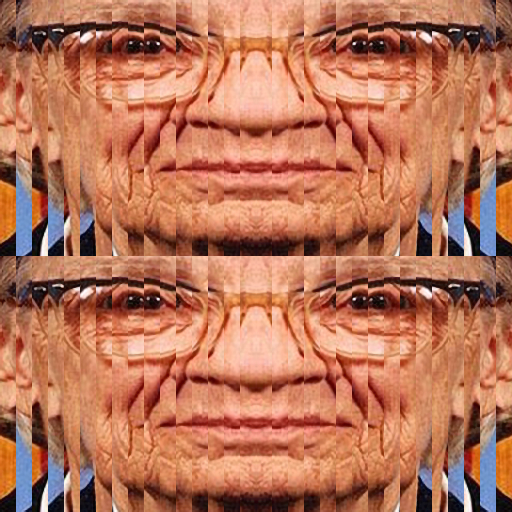

In [268]:

height, width, channels = img_array.shape

# Slice image into two halfs vertically
left_half_array = new_img_array[:, :width//2, :].copy()
right_half_array = new_img_array[:, width//2:, :].copy()

interleaved_hor_array = np.zeros_like(img_array)



for i in range(slice_width):
    interleaved_hor_array[:, i::slice_width*2, :] = left_half_array[:, i::slice_width, :]
    interleaved_hor_array[:, i+slice_width::slice_width*2, :] = right_half_array[:, i::slice_width, :]

display(Image.fromarray(interleaved_hor_array))

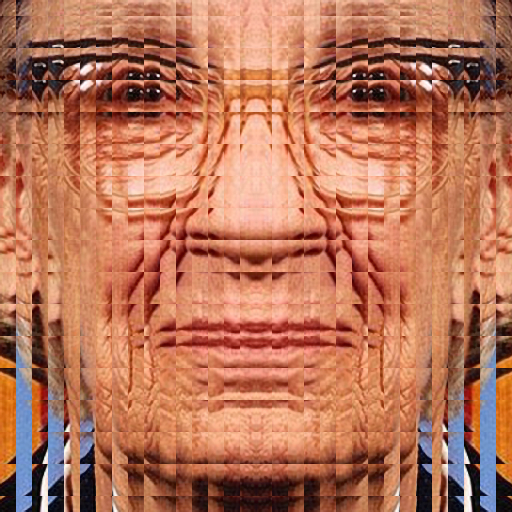

In [269]:

# Slice image into two halfs horizontally
top_half_array = interleaved_hor_array[:height//2, :, :].copy()
bottom_half_array = interleaved_hor_array[height//2:, :, :].copy()

interleaved_ver_array = np.zeros_like(img_array)

for i in range(slice_width):
    interleaved_ver_array[i::slice_width*2, :, :] = top_half_array[i::slice_width, :, :]
    interleaved_ver_array[i + slice_width::slice_width*2, :, :] = bottom_half_array[i::slice_width, :, :]

display(Image.fromarray(interleaved_ver_array))